In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import dependencies packages of Python

In [15]:
import modules.eda as Detective
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Đọc dữ liệu từ project 1.

In [16]:
reviews = pd.read_csv("./data/normalize_reviews.csv").fillna("")

In [17]:
reviews.head()

,raw_comment,label,normalize_comment,emoji
0,Giao hàng kh đúng cần phê bình hjjjjjhhd...,0,giao hàng không đúng cần phê bình,
1,Chất lượng sản phẩm tạm được. Giao...,0,chất lượng sản phẩm tạm được giao ...,
2,Ko có lắc tay như hình,0,không có lắc tay như hình,
3,Giao hàng lâu. Bảo có lắc tay mà k thâ...,0,giao hàng lâu bảo có lắc tay mà không ...,
4,"Mình mua 2 cái, một dùng ok. Một cái k...",0,mua cái một dùng ok một cái không chạ...,😢


Bây giờ ta sẽ tạo ra hai feature có tên là:
* `length`: là chiều dài của feature `normalize_comment`.
* `no_words`: là số từ của feature `normalize_comment`.  

In [18]:
reviews['length'] = reviews['normalize_comment'].str.len()
reviews['no_words'] = reviews['normalize_comment'].str.split(" ").agg([len])

In [19]:
reviews.head()

,raw_comment,label,normalize_comment,emoji,length,no_words
0,Giao hàng kh đúng cần phê bình hjjjjjhhd...,0,giao hàng không đúng cần phê bình,,40,7
1,Chất lượng sản phẩm tạm được. Giao...,0,chất lượng sản phẩm tạm được giao ...,,79,13
2,Ko có lắc tay như hình,0,không có lắc tay như hình,,31,6
3,Giao hàng lâu. Bảo có lắc tay mà k thâ...,0,giao hàng lâu bảo có lắc tay mà không ...,,151,28
4,"Mình mua 2 cái, một dùng ok. Một cái k...",0,mua cái một dùng ok một cái không chạ...,😢,55,10


Bây giờ chúng ta sẽ sắp xếp lại thứ tự của các feature trong `reviews`.

In [20]:
reviews = reviews[['raw_comment', 'normalize_comment', 'length', 'no_words', 'emoji', 'label']]

In [21]:
reviews.head()

,raw_comment,normalize_comment,length,no_words,emoji,label
0,Giao hàng kh đúng cần phê bình hjjjjjhhd...,giao hàng không đúng cần phê bình,40,7,,0
1,Chất lượng sản phẩm tạm được. Giao...,chất lượng sản phẩm tạm được giao ...,79,13,,0
2,Ko có lắc tay như hình,không có lắc tay như hình,31,6,,0
3,Giao hàng lâu. Bảo có lắc tay mà k thâ...,giao hàng lâu bảo có lắc tay mà không ...,151,28,,0
4,"Mình mua 2 cái, một dùng ok. Một cái k...",mua cái một dùng ok một cái không chạ...,55,10,😢,0


Mặc dù ở project 1 chúng ta đã biết khá rõ ta đã làm mọi thử để ta có một dataset mà **cân bằng về số lượng observe ở các class**. Mặc dù vậy ta có thể trực quan hóa về số lượng các sample trong từng class của dataset này lên một biểu đồ nào đó. Vì ta chỉ có 2 class là **negative** và **positive** - nên pie chart sẽ là một biểu đồ lí tưởng để làm điều này.

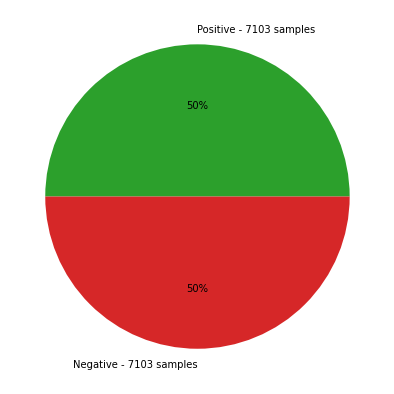

In [22]:
Detective.pieChart(reviews)

**Nhận xét**:
* Vì dữ liệu của ta ở project 1 ta đã làm nó có sự cân bằng giữa hai class, và với dataset này cũng chỉ có 2 class trong target variable nên ta chưa thấy được lợi ích của quá trình data visualization, nếu target variable của chúng ta có nhiều class hơn thì pie chart giúp ta thấy được class nào đang áp đảo các class nào hơn về mặt số lượng, tỉ lệ giữa các class - điều mà nếu chỉ nhìn bằng các con số ta đôi khi khó mường tượng và rất mơ hồ.

* Tiếp theo, chúng ta cũng cần đặt câu hỏi: "Liệu giữa negative và positive class, khách hàng của class nào có xu hướng sử dụng comment trong phần bình luận của họ hơn?".
* Vì ở đây, chúng ta đang **quan tâm về số lượng** nên bar chart là một biểu đồ đủ tốt để ta trực quan hóa được điều này.

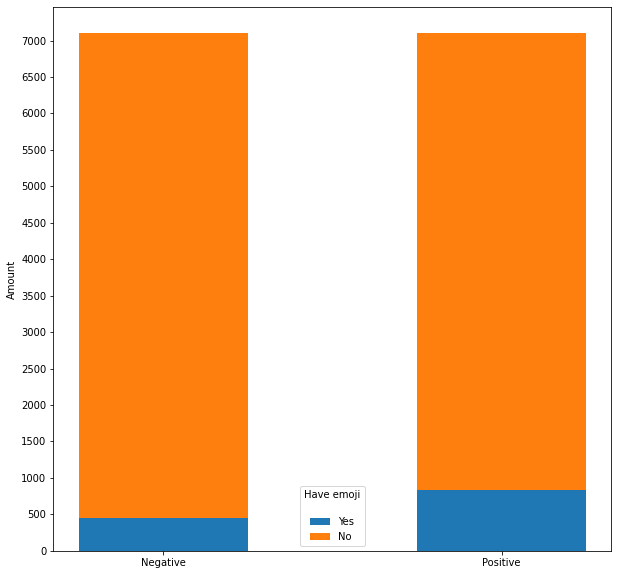

In [23]:
Detective.emojiClassBarplot(reviews)

> **Nhận xét**
> * Có thể thấy rằng số khách hàng thuộc nhóm positive có xu hướng sử dụng comment nhiều hơn trong comment của họ so với khách hàng nhóm negative, tuy nhiên khác biệt này cũng không quá lớn.
> * Ngoài ra, ta có thể thấy khách hàng trên shopee đa phần cũng sẽ không sử dụng emoji trong comment của mình cho lắm. Điển hình với khách hàng nhóm nagative, tỉ lệ khách hàng có dùng emoji trong comment của mình chỉ khoảng từ $(5, 7)$ phần trăm. Ở nhóm positive là khoảng $(10, 13)$ phần trăm.

Tiếp theo, ta có thể xem phân phối của feature `length` để xem giữa class **negative** và **positive** có điểm gì khác nhau. 

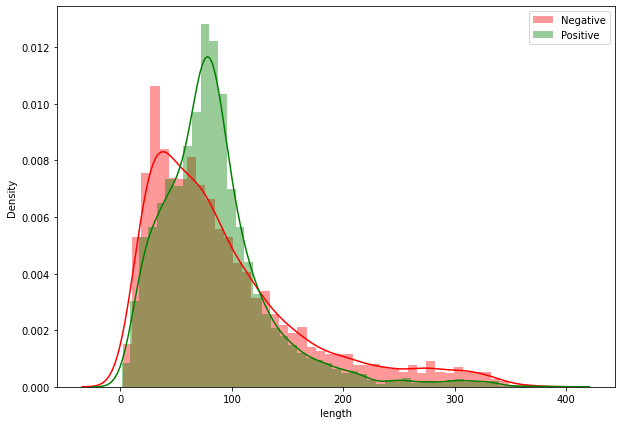

In [24]:
Detective.lengthDistplot(reviews)

> **Nhận xét**:
> * Các khách hàng thuộc nhóm negative thông thường có chiều dài comment nằm trong khoảng từ 25 đến 80.
> * Trong khi đó, các khách hàng nhóm positive thì thường có bình luận dài hơn so với nhóm negative, thường nằm trong khoảng từ 40 đến 130.
> * MỘt điều nữa là khách hàng nhóm positive không chỉ comment dài hơn mà còn có mật độ tập trung cao hơn.
> * Tuy nhiên vẫn có các comment mà có chiều dài chạm mốc hơn 300, liệu chúng có phải outlier do qua trình tiền xử lí ta làm không tốt không, bước dưới đây ta sẽ nhìn kĩ vào hơn các sample này.

Ở bước này, ta sẽ xem các comment mà có chiều dài lớn hơn 300, xem chúng có phải là outlier hay noise không.

In [49]:
cmt_gt_300 = reviews.loc[reviews[reviews['length'] > 300].index]['normalize_comment']

len(cmt_gt_300)

234

In [52]:
for cmt in cmt_gt_300[:10]:
    print(cmt, "\n")

hàng không như hình mẫu trong mẫu viền mặt đồng hồ màu vàng nhưng mua về màu bạc có vết sứt to dây đồng hồ mỏng manh giao hàng siêu siêu chậm điểm cộng là màu trắng ở mặt đéo hiểu rất trắng rất mới kết hợp dây màu đen tuyền rất hợp lí cả giá rẻ nên tạm chấp nhận 

không trung thực nhìn thấy địa chỉ là nên mới đặt vì thực sự cần gấp đồ cũng gọi điện trực tiếp nhờ giục giao gửi đồ từ kho tb nhưng khẳng định là gửi từ kho thanh xuân nhờ cả bên bưu cục check mã đơn hàng tự lấy còn không thèm rep dịch vụ kém 

mua chiếc khác nhau chiếc ok rất ưng nhưng chiếc lắm khá thất vọng trước cũng đặt bên lần chiếc y bây giờ mua tiếp nhưng màu dây khá đậm đen bóng xấu còn phần dây cài có mỗi dây cài trong dây cài bé quá không cài được luôn cố nhét vô đứt luôn dây 

ổn có lẽ ho

> **Nhận xét**:
> * Có lẽ là do ta suy nghĩ quá nhiều, dù có đến hơn 200 bình luận có chiều dài hơn 300 nhưng những bình luận này mang lại cho ta nhiều thông tin hơn là các bình luận thuộc nhóm có mật độ cao mà ta đã làm bước trước.

Bước trước ta đã minh họa một distribution plot trên feature `length`, bước này ta có thể sử dụng histogram để biểu diễn frequency của feature `no_words` trong các comment, nghe có vẻ dư thừa vì số từ nhiều đồng nghĩa với việc câu sẽ dài ra. Nhưng với một dữ liệu mà ta chỉ mới tiếp xúc lần đầu, mọi thao tác xử lí trên nó đều có giá trị, biết đâu sẽ cho ta có được nhiều các nhìn hơn về dữ liệu hiện có.
Tuy nhiên, ta cũng cần lưu ý, vì câu của ta có chiều dài đa phần nằm trong khoảng từ 25 đến 130, nên ta cần phải chọn một **bin value** phù hợp, ở đây ta sẽ thử với bin 30.

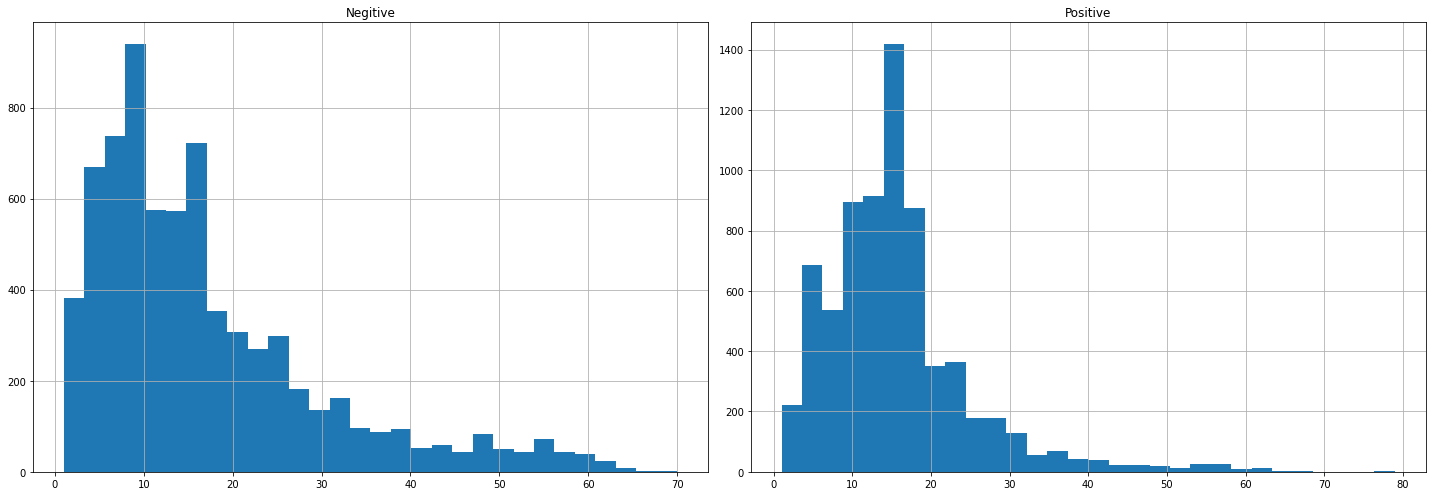

In [53]:
Detective.noWordsFrequency(reviews)

> **Nhận xét**:
> * Nhóm khách hàng negative thường dùng khoảng từ 5 đến 15 từ trong một bình luận, frequency là 600.
> * Nhóm khách hàng positive thường dùng khoảng 8 đến 18 từ trong một bình luận với frequency cao hơn là 800, đặc biệt họ thường dùng khoảng 15 từ để bình luận với frequency chạm mốc hơn 1400.
> * Nhìn chung, các từ tiếng việt phổ biến thường trong khoảng 4 kí tự, vậy chiều dài trung bình của một bình luận nếu ta tính một cách ước chừng là $4 * 10 + 9 = 49$. Khi ta xem lại distribution plot mà ta đã vẽ cho feature `length`, ta thấy được hai đường **KDE** cắt nhau lần đầu cũng tại `length` có giá trị đâu đó nằm loanh quanh 50.
> * Từ đây thì với tiếng việt, suy nghĩ của ta ban đầu là từ nhiều thì câu dài cũng có phần chính xác. Với các ngôn ngữ khác, điều này có thể không còn đúng nữa, trong tiếng việt từ dài nhất là **nghiêng** với 7 kí tự và ngắn nhất là **ba** với 2 kí tự, trong khi đó với các ngôn ngữ khác như tiếng anh có từ lên đến 45 kí tự là "**Pneumonoultramicroscopicsilicovolcanoconiosis**" chỉ dùng để chỉ một căn bệnh về phổi, ngoài ra ta cũng có thể tìm hiểu về độ dài trung bình của các từ trong các ngôn ngữ khác nhau ở đây [http://www.ravi.io/language-word-lengths](http://www.ravi.io/language-word-lengths).

Ở các bước trên, ta dùng phương pháp visualization phân tích dữ liệu theo từng class positive và negative riêng biệt. Nếu ta muốn xem toàn bộ bức tranh, không phân biệt negative hay positive, thì ta có thể áp dụng các phương pháp của thống kê mô tả trên hai feature là `length` và `no_words` bằng hàm `describe()`.

In [55]:
reviews[['length', 'no_words']].describe()

,length,no_words
count,14206.000000,14206.000000
mean,88.684922,16.200831
std,62.465665,11.249186
min,1.000000,1.000000
25%,46.000000,9.000000
50%,76.000000,14.000000
75%,110.000000,20.000000
max,395.000000,79.000000


> **Nhận xét**:
> * Ta thấy rằng bình luận có `length` ngắn nhất là 1, tôi cũng không biết từ tiếng việt nào có 1 kí tự nữa, dài nhất là 395, trung bình là khoảng 88. Mọi thứ đều hợp lí với biểu đồ distribution mà ta vẽ cho từng class riêng biệt.
> * Ở feature `no_words`, thì bình luận có nhiều từ nhất là 79 từ với trung bình là 16 từ cho một bình luận.
> * Ở đây, không cần trực quan hóa mà chỉ cần nhìn vào số liệu, ta rõ ràng thấy được cả `length` và `no_words` đều có phân phối lệch phải _(right-skewed)_. Tuy nhiên, bài toán của ta là sentiment analysis, ta quan tâm hơn về mặt ngữ nghĩa từ ngôn ngữ - cấu trúc câu hơn là số liệu thống kê. Giả sử đây là bài toán hồi quy, thì ta có thể áp dụng **log-transformation** để giảm độ lệch phải của dữ liệu.

![](./images/08.gif)